<a href="https://colab.research.google.com/github/yoon-goorie/aiffel/blob/main/%5B%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_ABC_10%5D_(%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8)_%EB%AA%A8%EB%91%90%EC%B9%B4%ED%8E%98_%EA%BC%BC%EA%BC%BC%ED%9E%88_%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 ABC
## 10. (프로젝트) 모두카페 꼼꼼히 살펴보기
### 3-1 데이터 불러오기

In [ ]:
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data

ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/entry_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/item_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/item_entry_data.csv': File exists
ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/sales_data.csv': File exists


In [ ]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [ ]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [ ]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [ ]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [ ]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [ ]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 3-2 데이터 분석하기

1. 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
- 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
- 힌트: groupby() 함수를 사용하세요


In [ ]:
# 문제 1: 월별 매출액 추세
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


In [ ]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var['결제금액'] = sales_data['결제금액'].astype('int64')

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date').agg({'결제금액':'sum'})

In [ ]:
payment_data

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


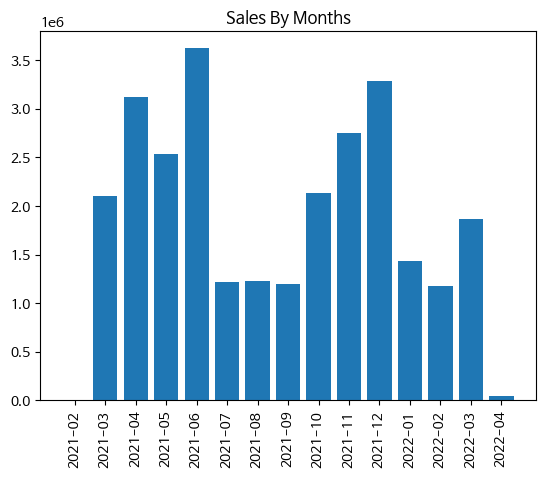

In [ ]:
plt.bar(payment_data.index, payment_data['결제금액'].values)
plt.title("Sales By Months")
plt.xticks(rotation = 90)
plt.show()

2. 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
- 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
- 힌트: value_counts() 함수를 사용하세요.

In [ ]:
# 문제 2: 가장 인기 있는 음식/음료
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]

## 이 부분에 대한 논의가 많던데 정확하게 이해하진 못했다. 
## 결제 취소건만 제외하면 안되고, 같이 쌍으로 이뤄진 판매값도 제외해야 할텐데, 그건 어떻게 제외하지?

temp_var = sales_data
temp_var['상품명'][temp_var['판매수량']!=-1].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
popular_sales = temp_var['상품명'][temp_var['판매수량']!=-1].value_counts()
popular_sales.head(10)
popular_sales.head(10).to_frame()

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [ ]:
items_count = temp_var['상품명'][temp_var['판매수량']!=-1].value_counts()
items_count.head(10)
items_count.head(10).to_frame()

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [ ]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


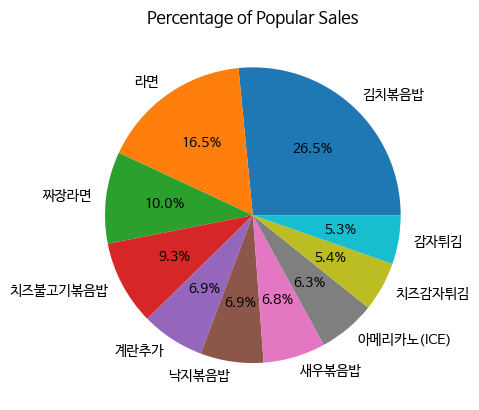

In [ ]:
# 집계 결과를 시각화하기
highlight = items_count.head(10)
plt.pie(highlight, labels=highlight.index, autopct='%1.1f%%')
plt.title('Percentage of Popular Sales')
plt.show()

- 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
- 힌트: value_counts() 함수를 사용하세요.

In [ ]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
#temp_var.groupby('상품명')['결제금액'].sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기

temp_var = sales_data
temp_var['매출'] = temp_var['결제금액'] * temp_var['판매수량']
total_sales = temp_var.groupby('상품명')['매출'].sum()
items_payment = total_sales.sort_values(ascending=False).head(10)


#temp_var.sort_values(by='결제금액',ascending=False).head(10)

In [ ]:
items_payment

상품명
김치볶음밥         6036900
라면            2967000
치즈불고기볶음밥      2309100
짜장라면          2044500
낙지볶음밥         1721700
새우볶음밥         1549800
치즈감자튀김        1359700
아메리카노(ICE)    1180100
감자튀김          1083800
불닭볶음면          697500
Name: 매출, dtype: int64

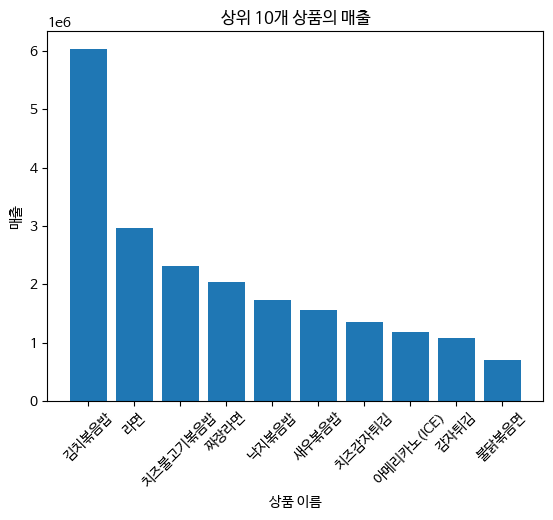

In [ ]:
plt.bar(items_payment.index, items_payment.values)
plt.title("상위 10개 상품의 매출")
plt.xlabel("상품 이름")
plt.ylabel("매출")
plt.xticks(rotation = 45)
plt.show()

3. 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
- 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
- 힌트: value_counts() 함수를 사용하세요.

In [ ]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = entry_data['금액'].astype('int64')

# temp_var의 금액을 요금제명을 기준으로 집계하기
ticket_sales = temp_var.groupby('요금제명')['금액'].sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
ticket_payment = ticket_sales.sort_values(ascending=False).head(10)
ticket_payment

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

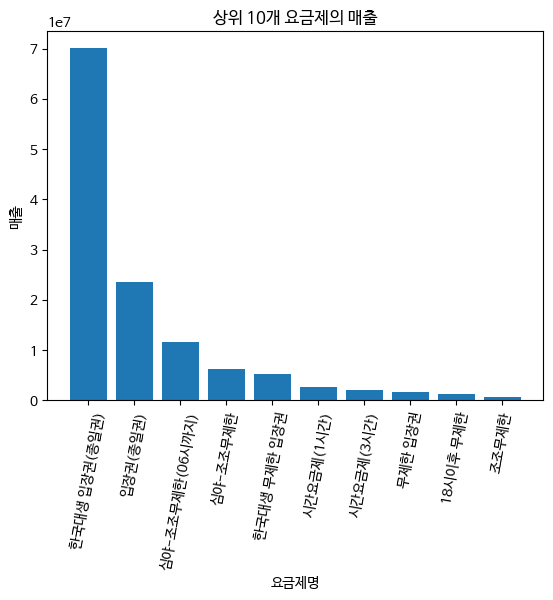

In [ ]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

# 집계 결과 시각화하기
plt.bar(ticket_payment.index, ticket_payment.values)
plt.title("상위 10개 요금제의 매출")
plt.xlabel("요금제명")
plt.ylabel("매출")
plt.xticks(rotation = 80)
plt.show()

### 내가 정의한 문제 해결하기  
#### 모두카페의 VIP 고객은 누구인가
##### 1) 가장 자주 방문한 고객
###### 2) 가장 많이 매출을 올려준 고객 

In [ ]:
# 가장 자주 방문한 고객 

temp_var = entry_data

# 고객 이름별 방문 횟수를 세어서 dictionary에 저장
visit_counts = {}
for customer in temp_var['고객'].unique():
    count = temp_var[temp_var['고객'] == customer].shape[0]
    visit_counts[customer] = count

# 방문 횟수가 많은 순서대로 정렬
sorted_customers1 = sorted(visit_counts.items(), key=lambda x: x[1], reverse=True)

# 상위 10명의 고객 이름과 방문 횟수 출력
for customer, count in sorted_customers1[:10]:
    print(f"{customer} : {count}회 방문")

customer666446 : 168회 방문
customer440840 : 150회 방문
customer338849 : 142회 방문
customer258946 : 138회 방문
customer490993 : 101회 방문
customer667032 : 101회 방문
customer229550 : 98회 방문
customer300766 : 90회 방문
customer468231 : 69회 방문
customer581973 : 67회 방문


In [ ]:
# 가장 많이 매출을 올려준 고객

temp_var2 = sales_data

# 고객 이름별 매출을 합산해서 dictionary에 저장
sales_totals = {}
for customer in temp_var2['고객'].unique():
    total = temp_var2[temp_var2['고객'] == customer]['결제금액'].sum()
    sales_totals[customer] = total

# 매출이 많은 순서대로 정렬
sorted_customers2 = sorted(sales_totals.items(), key=lambda x: x[1], reverse=True)

# 상위 10명의 고객 이름과 매출 출력
for customer, total in sorted_customers2[:10]:
    print(f"{customer} : {total}원")


customer667032 : 263500원
customer499864 : 151300원
customer977070 : 128800원
customer859632 : 118500원
customer581973 : 112500원
customer910882 : 110000원
customer917331 : 108500원
customer621866 : 106500원
customer575860 : 102500원
customer244232 : 95500원


### 회고

#### 핵심 문제: 모두카페의 상태는 어떤가?

1. 월별 매출액 추세  
- 방학 기간(1-2월, 6-8월)에 매출이 낮고, 학기 중에 매출이 높음 (특히 중간, 기말 고사 기간)
- 학교 근처에 있는 카페임을 알 수 있음  
  
2. 가장 인기있는 음식/음료
- 김치볶음밥이 제일 인기가 많음.
- 카페인데 김치볶음밥, 라면 등이 인기인 것으로 보아 식사를 떼우면서 공부를 같이 할 수 있는 곳의 인기가 많은 곳인가봄.
- PC방을 해도 잘 될 것 같네..ㅎㅎ  
  
3. 가장 많이 팔린 입장권 종류
- 한국대생입장권 (종일권)이 제일 많이 팔린 입장권임. 
- 이를 통해 본 카페는 한국대 근처에 있는 학생 위주의 카페임을 알 수 있음.

4. VIP는 누구인가?
- 'customer667032', 'customer581973' 이 VIP임.

----------------------------------------------------------------

#### 개인적인 생각
- 일방적으로 강의를 들을 때는 다 이해했다고 생각하고 넘어갔는데 막상 주도적으로 문제를 풀어보려고 하다보니 함수를 사용하는 법부터 전혀 감이 잡히지 않았다. 어떤 함수를 써야하고, 어떤 흐름대로 써야하고, 이 함수에는 어떤 인자를 넣어서 써야하는지 등등.. 멘붕이었다. 
- 게다가 방대한 양의 여러가지 데이터를 놓고 분석해서 어떤 전략을 도출해내야 하는 부분들도 정말 어려웠다. 회사 다닐 때만해도 엑셀에 데이터를 넣고 보고 분석하는게 익숙했는데, 낯선 툴로 기존에 다루던 양의 데이터보다 훨씬 복잡한 데이터를 다루다보니 막막했었다.
- 데이터 분석에 관심이 있어서 아이펠 공부를 시작했는데 과연 할 수 있을까 라는 두려움이 생겼다. 
- 하지만 지속적으로 반복학습을 하다보면 언제가 통달하게 되는 날이 오겠지?
- 기술블로그 작성을 하루 빨리 시작해봐야겠다. 